In [1]:
import os
import re
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import custom_module as M

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# get master dict and convert to df
_dict = M.gather_dicts()
df = pd.DataFrame.from_dict(_dict)
df

,test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,...,test22,test23,test24,test25,test26,test27,test28,test29,test30,test31
computer,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 4530s,...,HP ProBook 4530s,HP ProBook 4530s,Inspiron 13-5378,HP ProBook 450 G5,Inspiron 13-5378,Dell System Inspiron N7110,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 450 G5
data,"{'time': ['12:03:59', '12:07:13', '12:11:15', ...","{'time': ['12:46:26', '12:50:20', '12:52:20', ...","{'time': ['13:31:28', '13:35:30', '13:38:15', ...","{'time': ['14:09:46', '14:11:36', '14:16:51', ...","{'time': ['16:26:02', '16:28:46', '16:32:11', ...","{'time': ['18:19:50', '18:24:21', '18:28:50', ...","{'time': ['10:29:54', '10:32:24', '10:33:27', ...","{'time': ['11:06:16', '11:07:59', '11:11:08', ...","{'time': ['13:20:36', '13:25:25', '13:26:01', ...","{'time': ['16:29:26', '16:32:21', '16:34:55', ...",...,"{'time': ['14:02:31', '14:05:38', '14:10:09', ...","{'time': ['15:16:49', '15:20:24', '15:24:12', ...","{'time': ['19:12:06', '19:13:22', '19:14:48', ...","{'time': ['18:57:49', '18:58:43', '19:01:42', ...","{'time': ['11:41:56', '11:45:05', '11:46:31', ...","{'time': ['11:27:06', '11:32:27', '11:36:39', ...","{'time': ['12:20:42', '12:24:41', '12:28:20', ...","{'time': ['18:39:45', '18:42:19', '18:43:01', ...","{'time': ['20:14:42', '20:19:18', '20:21:39', ...","{'time': ['19:19:56', '19:21:49', '19:23:09', ..."
day,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-10,2020-06-10,2020-06-10,...,2020-06-13,2020-06-13,2020-06-13,2020-06-13,2020-06-14,2020-06-14,2020-06-14,2020-06-15,2020-06-15,2020-06-16
location,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,...,lower west,lower west NEW,upper east,upper west,upper east,upper east,upper west,upper west,upper west,upper west
router_location,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,living room west corner,...,living room west corner,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs,hallway upstairs
test,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31


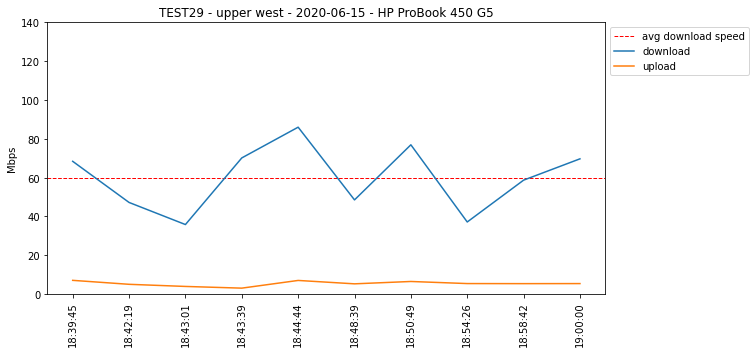

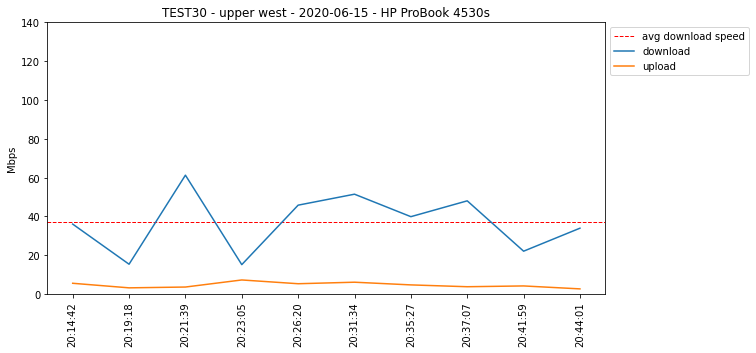

In [3]:
M.plot_single(df, 'test29');
M.plot_single(df, 'test30');

In [4]:
data = M.transform_data(df)
data

,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,...,lower west,lower west NEW,upper east,upper west,upper east,upper east,upper west,upper west,upper west,upper west
0,99.751580,41.039935,93.493913,66.902935,32.044196,66.419107,122.409275,24.492825,31.211880,32.814672,...,43.092668,58.593486,52.924307,78.373506,49.485133,26.256596,85.058094,68.368880,36.033226,96.903886
1,69.165935,47.908396,67.554907,109.046060,14.903680,61.665326,107.105495,29.259755,32.348858,18.641280,...,33.420106,83.177536,26.753808,67.087704,56.081554,61.111176,61.016275,47.183570,15.366986,60.816725
2,82.097260,41.205536,77.519773,75.464375,41.233320,37.660307,34.099353,46.525715,39.120474,14.031744,...,77.607714,82.263593,42.888960,94.164055,62.518599,109.964235,86.649433,35.797799,61.227634,42.158914
3,76.162253,49.155870,104.369230,80.596316,22.511722,55.285879,65.111738,37.090685,21.847185,15.798649,...,48.858853,51.457700,57.502100,80.150975,21.567756,83.974715,84.271139,70.114287,15.153294,54.258731
4,49.996191,70.795400,59.548327,56.638547,24.779011,11.976199,119.922186,66.819126,49.677905,40.156984,...,70.179552,32.801772,69.846366,121.458752,26.273027,88.335140,121.562415,85.950200,45.787485,40.932066
5,80.555113,25.725200,125.089836,85.813226,27.821760,12.257830,61.931694,32.642292,36.459608,48.074930,...,50.651072,44.986142,45.351513,56.564480,51.617536,117.621934,101.177895,48.499048,51.434340,83.658395
6,132.313207,50.335698,57.063406,107.269454,15.754265,44.757760,48.782933,70.483728,45.251242,23.157007,...,64.060100,50.675471,42.066590,122.638476,49.052054,79.539292,95.383155,76.877760,39.858768,28.941535
7,118.668693,33.906345,102.293335,92.528915,39.562590,54.784480,66.499452,43.154635,48.388661,49.213574,...,69.339780,57.353136,43.507610,47.469679,26.917698,74.772396,103.035014,37.117475,48.012056,55.507692
8,97.323495,61.458700,33.933635,89.636640,42.674279,20.726856,63.223840,75.289383,32.906248,55.514818,...,66.123071,47.443467,50.127595,100.338439,27.693235,58.851078,84.627379,58.667073,22.078189,47.128693
9,88.024754,48.716588,105.148166,121.669805,44.402936,30.362494,104.535887,24.037394,56.697534,35.752466,...,61.106145,53.237558,29.884293,77.125899,70.392392,46.461475,108.048655,69.648972,33.924512,38.580008


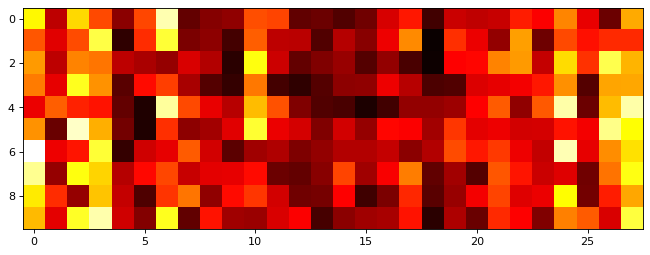

In [5]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

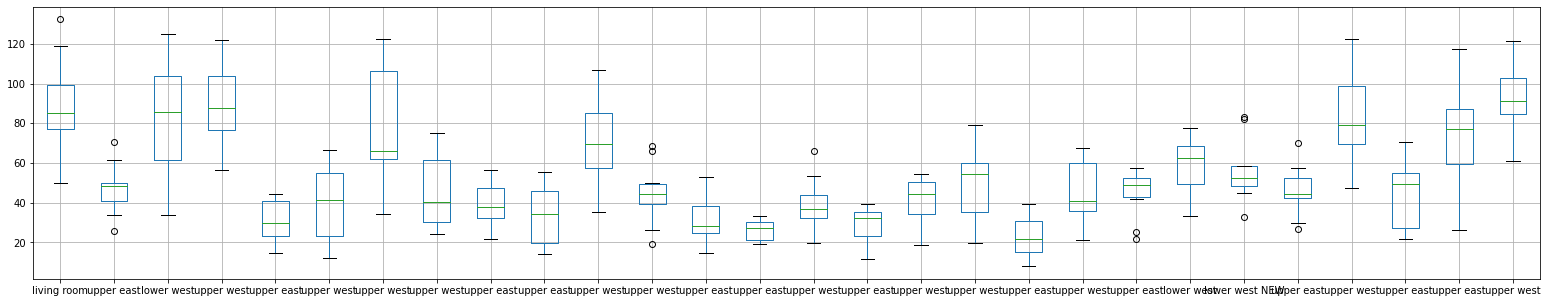

In [6]:
fig, ax = plt.subplots(ncols=1, figsize=(27,5))
ax.set_xticklabels(data.columns,  rotation=45, rotation_mode="anchor")
data.boxplot();

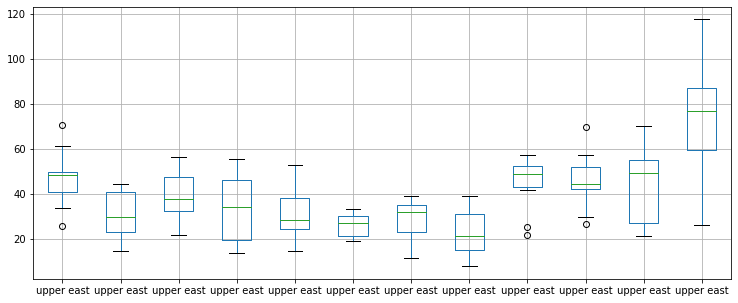

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(12.5,5))
data['upper east'].boxplot();

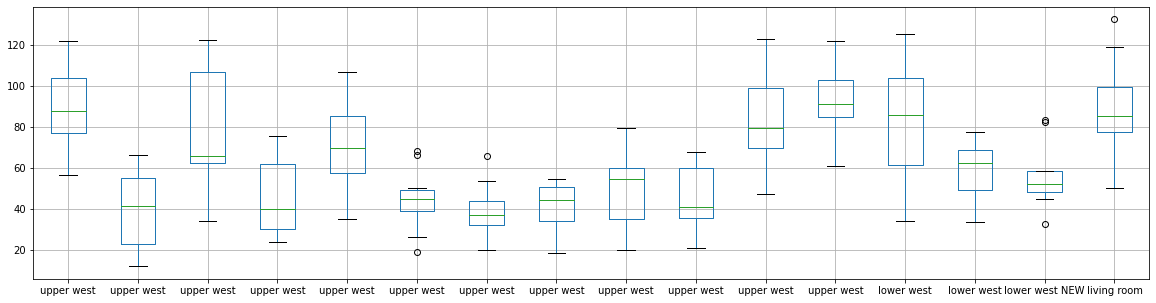

In [8]:
fig, ax = plt.subplots(ncols=1, figsize=(20,5))
data[['upper west','lower west', 'lower west NEW','living room']].boxplot();

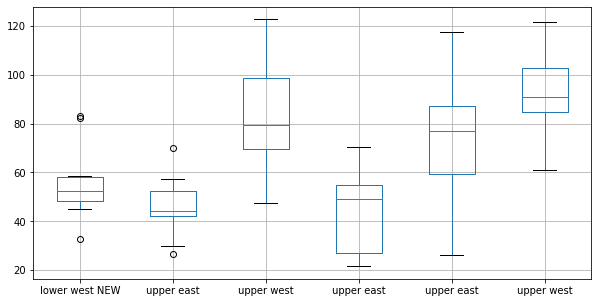

In [18]:
data.iloc[:,22:29].boxplot();